In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sparsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Cleaning

In [8]:
#adding the column names.
df=pd.read_csv('Data3.csv',names=['Sentiment','Tweet'])

In [9]:
df.isnull().sum()
#no null values

Sentiment    0
Tweet        0
dtype: int64

In [10]:
# removing unnecessary characters, Lowercasing the data and splitting the words in the form of a list
corpus=[]
for i in range(0,len(df)):
    scan=re.sub(r'^RT[\s]+', '',df['Tweet'][i])
    scan=re.sub(r'https?://[^\s\n\r]+', '',scan)
    scan=re.sub(r'#', '',scan)
    scan=re.sub('^@','',scan)
    scan=scan.lower().split()
    scan=[ps.stem(word) for word in scan if not word in stopwords.words('english')]
    corpus.append(scan)
corpus
len(corpus)


23096

In [11]:
corpus

[['jeffrubenstein',
  'pfft,',
  'forget',
  'disgaea',
  '(great',
  'game)...',
  'play',
  'suikoden',
  'psp',
  'instead.'],
 ['lie', 'bed', 'watch', 'disney', 'channel'],
 ['jessi_lea',
  'depends,',
  'think',
  'design',
  'stuff,',
  'us',
  'site',
  'also',
  'love',
  'urban',
  'outfitters,',
  'send',
  'websit'],
 ["i'm", 'excit', 'bout', 'saturday!', 'hope', 'fatin', 'make', 'time'],
 ["i'll", 'pretend....', "i'm", 'good', 'it.', 'happppi', 'brittney!'],
 ['watch', 'music', 'video'],
 ['babblingbrookie:',
  'tri',
  'this.',
  'concentr',
  'four',
  'dot',
  'middl',
  'pictur',
  '30',
  'secs....'],
 ['andygould', 'sort', 'meet', 'escala?'],
 ['gocheeksgo', "i'm", 'sure', 'now,', 'case.'],
 ['iiicce', 'cream'],
 ['cindyleigh', 'course,', 'peopl', 'would', 'think', 'scam', 'spammer'],
 ['littlefuoco', 'good', 'morning!', 'much', 'seen', 'far?'],
 ['mani',
  'thing',
  'mind-i',
  'want',
  'go',
  'shopping...i',
  'realli',
  'like',
  'rain..im',
  'excit',
  'power

In [12]:
corpus_list=[]
for i in corpus:
    for j in i:
        corpus_list.append(j)
corpus_list
len(corpus_list)

187360

Now our aim is to Create Vocabulary vocab{}

In [13]:
#finding the number of distinct words in corpus
Voc=set()
for i in corpus_list:
     Voc.add(i)
Voc
len(Voc)


44956

In [14]:
# now Making a table of positive and negative frequencies
#frequencies are nothing but dictionary mapping from (word,class) to its Frequency.
#first making dataframes of positive and negative tweets.
df_positive=df.loc[df['Sentiment']==4,['Sentiment','Tweet']]
df_positive
df_negative=df.loc[df['Sentiment']==0,['Sentiment','Tweet']]
df_negative

,Sentiment,Tweet
11633,0,"not happy at the @spotify sliding display ad, ..."
11634,0,Acting up pay gone my life is a misery.
11635,0,@Woth2982 Uh oh.... Me no likey mad Katie
11636,0,Working till 3
11637,0,@bubbleloveee hahaha! I'm trying to exercise a...
...,...,...
23091,0,Sick Spending my day laying in bed listening ...
23092,0,Gmail is down?
23093,0,rest in peace Farrah! So sad
23094,0,@Eric_Urbane Sounds like a rival is flagging y...


In [15]:
corpus_positive=corpus[:len(df_positive)]
positive_list=[]
for i in corpus_positive:
    for j in i:
        positive_list.append(j)
positive_list
len(positive_list)
corpus_positive

[['jeffrubenstein',
  'pfft,',
  'forget',
  'disgaea',
  '(great',
  'game)...',
  'play',
  'suikoden',
  'psp',
  'instead.'],
 ['lie', 'bed', 'watch', 'disney', 'channel'],
 ['jessi_lea',
  'depends,',
  'think',
  'design',
  'stuff,',
  'us',
  'site',
  'also',
  'love',
  'urban',
  'outfitters,',
  'send',
  'websit'],
 ["i'm", 'excit', 'bout', 'saturday!', 'hope', 'fatin', 'make', 'time'],
 ["i'll", 'pretend....', "i'm", 'good', 'it.', 'happppi', 'brittney!'],
 ['watch', 'music', 'video'],
 ['babblingbrookie:',
  'tri',
  'this.',
  'concentr',
  'four',
  'dot',
  'middl',
  'pictur',
  '30',
  'secs....'],
 ['andygould', 'sort', 'meet', 'escala?'],
 ['gocheeksgo', "i'm", 'sure', 'now,', 'case.'],
 ['iiicce', 'cream'],
 ['cindyleigh', 'course,', 'peopl', 'would', 'think', 'scam', 'spammer'],
 ['littlefuoco', 'good', 'morning!', 'much', 'seen', 'far?'],
 ['mani',
  'thing',
  'mind-i',
  'want',
  'go',
  'shopping...i',
  'realli',
  'like',
  'rain..im',
  'excit',
  'power

In [16]:

corpus_negative=corpus[len(df_positive)+1:]

print(len(corpus_negative))
corpus_negative
negative_list=[]
for i in corpus_negative:
    for j in i:
        negative_list.append(j)
len(negative_list)

11462


93950

In [17]:
pd.value_counts(np.array(positive_list))

love              854
i'm               839
good              789
go                785
thank             686
                 ... 
akathbilski         1
chaka               1
leftovers!          1
whu                 1
technologies..      1
Length: 27877, dtype: int64

In [18]:
#Vocabulary will be of the format (word,sentiment):
vocab={}
for tweet in corpus_positive:
    for word in tweet:
        if (word,4) in vocab:
            vocab[(word,4)]+=1
        else :
            vocab[(word,4)]=1
for tweet in corpus_negative:
    for word in tweet:
        if (word,0) in vocab:
            vocab[(word,0)]+=1
        else :
            vocab[(word,0)]=1

In [19]:
print(type(vocab))
vocab[('miss',0)]

<class 'dict'>


627

In [20]:
vocab

{('jeffrubenstein', 4): 1,
 ('pfft,', 4): 2,
 ('forget', 4): 28,
 ('disgaea', 4): 1,
 ('(great', 4): 1,
 ('game)...', 4): 1,
 ('play', 4): 123,
 ('suikoden', 4): 1,
 ('psp', 4): 2,
 ('instead.', 4): 7,
 ('lie', 4): 8,
 ('bed', 4): 141,
 ('watch', 4): 327,
 ('disney', 4): 10,
 ('channel', 4): 11,
 ('jessi_lea', 4): 1,
 ('depends,', 4): 1,
 ('think', 4): 331,
 ('design', 4): 17,
 ('stuff,', 4): 2,
 ('us', 4): 96,
 ('site', 4): 30,
 ('also', 4): 59,
 ('love', 4): 854,
 ('urban', 4): 2,
 ('outfitters,', 4): 1,
 ('send', 4): 68,
 ('websit', 4): 19,
 ("i'm", 4): 839,
 ('excit', 4): 118,
 ('bout', 4): 23,
 ('saturday!', 4): 3,
 ('hope', 4): 308,
 ('fatin', 4): 1,
 ('make', 4): 325,
 ('time', 4): 359,
 ("i'll", 4): 257,
 ('pretend....', 4): 1,
 ('good', 4): 789,
 ('it.', 4): 115,
 ('happppi', 4): 1,
 ('brittney!', 4): 1,
 ('music', 4): 67,
 ('video', 4): 65,
 ('babblingbrookie:', 4): 1,
 ('tri', 4): 193,
 ('this.', 4): 13,
 ('concentr', 4): 1,
 ('four', 4): 12,
 ('dot', 4): 5,
 ('middl', 4): 1

In [23]:
Voc_positive=set()
for i in positive_list:
     Voc_positive.add(i)



Voc_negative=set()
for i in negative_list:
     Voc_negative.add(i)


In [25]:
common=[]
for i in Voc_positive:
    if i in Voc_negative:
        common.append(i)

In [26]:
plot2=[]
for i in common :
     if vocab[(i,4)]>150 and vocab[(i,0)]>150:
          t=[i,vocab[(i,4)],vocab[(i,0)]]
          plot2.append(t)

In [27]:
plot2

[["i'll", 257, 153],
 ['time', 359, 364],
 ['im', 287, 356],
 ['wait', 201, 171],
 ['see', 408, 267],
 ['watch', 327, 157],
 ['hope', 308, 280],
 ['right', 161, 167],
 ['back', 241, 416],
 ['good', 789, 381],
 ['still', 208, 396],
 ['want', 232, 573],
 ['look', 277, 242],
 ['say', 172, 173],
 ["i'm", 839, 950],
 ['home', 171, 215],
 ['new', 371, 217],
 ['well', 220, 176],
 ['need', 276, 375],
 ['realli', 229, 401],
 ['go', 785, 1108],
 ['make', 325, 296],
 ['love', 854, 219],
 ['think', 331, 385],
 ['know', 361, 330],
 ['like', 562, 560],
 ['last', 161, 411],
 ['lol', 403, 185],
 ['2', 246, 345],
 ['&amp;', 309, 263],
 ['got', 385, 460],
 ['tri', 193, 223],
 ['today', 160, 422],
 ['feel', 227, 499],
 ['work', 325, 817],
 ['-', 515, 361],
 ['would', 221, 168],
 ['thing', 157, 168],
 ['sleep', 156, 185],
 ['one', 344, 341],
 ['day', 395, 571],
 ["can't", 206, 426],
 ['take', 187, 211],
 ['get', 657, 892],
 ['much', 182, 235],
 ['oh', 214, 266],
 ['u', 418, 244],
 ['come', 240, 226]]

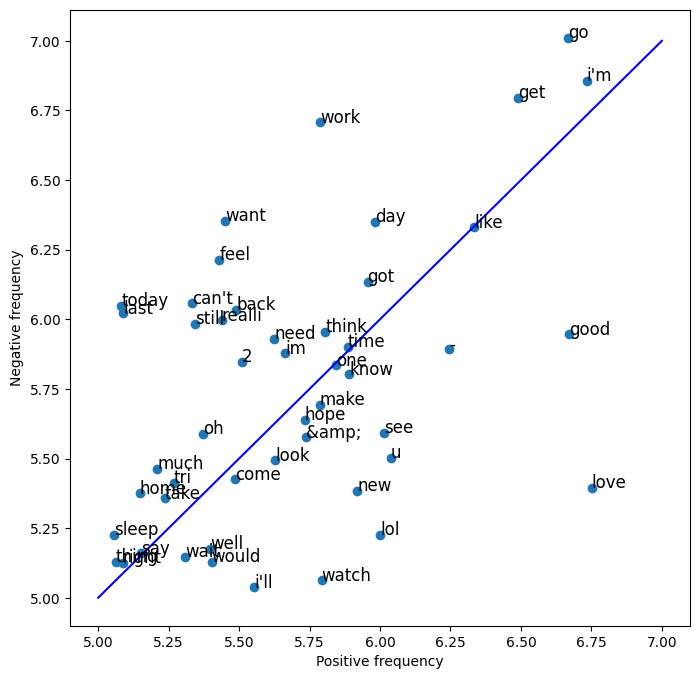

In [28]:
posfreqs=[]
negfreqs=[]
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,8))
for i in plot2:
        posfreqs.append(np.log(i[1] + 1 ))
        negfreqs.append(np.log(i[2] + 1 ))
for i in range(len(plot2)):
        ax.annotate(plot2[i][0], (posfreqs[i], negfreqs[i]), fontsize=12)
ax.scatter(posfreqs, negfreqs) 
ax.plot([5, 7], [5, 7], color = 'blue')
plt.xlabel("Positive frequency")
plt.ylabel("Negative frequency")
plt.show()

In [29]:
train_x=df['Tweet']
train_y=df['Sentiment']
vocab.get(('go',0))

def lookup(freqs, word, label):
   
    n = 0  

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]

    return n

Alright now we have a Vocabulary in the format '(word,sentiment):word_count'
lets train out naive bayes

In [30]:
loglikelihood = {}
logprior = 0

# calculating the number of unique words in the vocabulary
ss = set([x[0] for x in vocab.keys()])
V = len(ss)

# calculate 
# N_pos= sum of frequencies of positive words in dictionary ,
# N_neg= sum of frequencies of negative words in dictionary

N_pos =0
N_neg =0

for pair in vocab.keys():             # Here the pair is (word,sentiment)

    if pair[1] > 0:

            # Increment the number of positive words by the frequency for this (word, sentiment) pair
         N_pos += vocab[pair]

        # else, the label is zero
    else:

            # increment the number of negative words by the freq for this (word, sentiment) pair
        N_neg += vocab[pair]
    
    # Calculate D, the number of tweets
D = len(train_y)

    # Calculate D_pos, the number of positive tweets
    # Calculate D_neg, the number of negative tweets

D_pos = len(list(filter(lambda x: x ==4 , train_y)))

D_neg = len(list(filter(lambda x: x == 0, train_y)))

logprior = np.log(D_pos) - np.log(D_neg)
    
    # Iterating through each word in set
for word in ss:
    # get the positive and negative frequency of the word from vocab 
    freq_pos = lookup(vocab,word,4)
    freq_neg = lookup(vocab,word,0)

     # calculate the probability P(w|class) by using laplacian smoothing formula
    p_w_pos = (freq_pos+1)/(N_pos+V)
    p_w_neg = (freq_neg+1)/(N_neg+V)

    loglikelihood[word] = np.log(p_w_pos/p_w_neg)

print(logprior)
print(loglikelihood['best'])
print(loglikelihood['miss'])

0.014721429701756605
1.0617866637850528
-1.496901374221696


In [41]:
count_train=0
for i in range(len(corpus)):
    if get_sentiment(corpus[i],loglikelihood,logprior)==df['Sentiment'][i]:
        count_train+=1
accu=count_train/len(corpus)
accu

0.9361361274679598

Now as we have calculated the log prior and log likelihoods of all the words.

In [32]:
df2=pd.read_csv('testt.csv',names=['Sentiment','Tweet'])
corpus_test=[]
for i in range(len(df2)):
    new=re.sub(r'^RT[\s]+', '',df2['Tweet'][i])
    new=re.sub(r'https?://[^\s\n\r]+', '',new)
    new=re.sub(r'#', '',new)
    new=re.sub('^@','',new)
    new=new.lower().split()
    new=[ps.stem(word) for word in new if not word in stopwords.words('english')]
    corpus_test.append(new)
corpus_test


[['switchfoot',
  '-',
  'awww,',
  "that'",
  'bummer.',
  'shoulda',
  'got',
  'david',
  'carr',
  'third',
  'day',
  'it.',
  ';d'],
 ['upset',
  "can't",
  'updat',
  'facebook',
  'text',
  'it...',
  'might',
  'cri',
  'result',
  'school',
  'today',
  'also.',
  'blah!'],
 ['kenichan',
  'dive',
  'mani',
  'time',
  'ball.',
  'manag',
  'save',
  '50%',
  'rest',
  'go',
  'bound'],
 ['whole', 'bodi', 'feel', 'itchi', 'like', 'fire'],
 ['nationwideclass',
  'no,',
  'behav',
  'all.',
  "i'm",
  'mad.',
  'here?',
  "can't",
  'see',
  'there.'],
 ['kwesidei', 'whole', 'crew'],
 ['need', 'hug'],
 ['loltrish',
  'hey',
  'long',
  'time',
  'see!',
  'yes..',
  'rain',
  'bit',
  ',onli',
  'bit',
  'lol',
  ',',
  "i'm",
  'fine',
  'thank',
  ',',
  "how'",
  '?'],
 ['tatiana_k', 'nope'],
 ['twittera', 'que', 'muera', '?'],
 ['spring', 'break', 'plain', 'city...', 'snow'],
 ['re-pierc', 'ear'],
 ['caregiv',
  'bear',
  'watch',
  'it.',
  'thought',
  'ua',
  'loss',
  '

In [33]:
def get_sentiment(twt,ll,lp):
    sentiment=0
    for i in twt:
        if i not in ll:
            ll[i]=0
        sentiment+=ll[i]
    sentiment+=logprior
    if sentiment>0:
        senti=4
    else:
        senti=0
    return senti


In [42]:

TP = FP = TN = FN = 0
for i in range(len(corpus_test)):
    if (get_sentiment(corpus_test[i],loglikelihood,logprior)==df2['Sentiment'][i] and get_sentiment(corpus_test[i],loglikelihood,logprior)==4):
        TP += 1
    elif (get_sentiment(corpus_test[i],loglikelihood,logprior)==df2['Sentiment'][i] and get_sentiment(corpus_test[i],loglikelihood,logprior)==0):
        TN += 1 
    elif (get_sentiment(corpus_test[i],loglikelihood,logprior)==4  and df2['Sentiment'][i]==0):   
        FP += 1
    elif (get_sentiment(corpus_test[i],loglikelihood,logprior)==0 and df2['Sentiment'][i]==4):   
        FN += 1                 


print('TP=',TP)
print('TN=',TN)
print('FP=',FP)
print('FN=',FN)
# ACCURACY 
accuracy = round(((TP+TN)/len(corpus_test))*100,3)          
print('accuracy',accuracy,'%')

# PRECISION
precision = round((TP/(TP+FP))*100,3)
print('precision =',precision,'%')

# RECALL
recall = round((TP/(TP+FN))*100,3)
print('recall =',recall,'%')

# SPECIFICITY
specificity = round((TN/(TN+FP))*100,3)
print('specificity =',specificity,'%')

# F1-SCORE
f1_score = round(((2*precision*recall)/(precision+recall)),3)
print('f1_score =',f1_score,'%')

TP= 118
TN= 360
FP= 132
FN= 44
accuracy 73.089 %
precision = 47.2 %
recall = 72.84 %
specificity = 73.171 %
f1_score = 57.282 %


In [43]:
hi=['i','like','virat','kohli','batting']
get_sentiment(hi,loglikelihood,logprior)

4

In [44]:
hi=['i','hate','anubhav','nanda','and','vikas']
get_sentiment(hi,loglikelihood,logprior)

0

In [45]:
hi=['today','virat','kohli','got','out','on','186']
get_sentiment(hi,loglikelihood,logprior)

0

In [46]:
hi=['i','hate','chinese','italian','but','not', 'belgian','food']
get_sentiment(hi,loglikelihood,logprior)

0

In [47]:
hi=['hitler','shot','his','dog','blondi','so','that', 'she', 'did', 'not', 'fall' ,'into','the','hands','of' ,'the','Soviets']
get_sentiment(hi,loglikelihood,logprior)

0